# TODO
- #TODO: Clean validation data
- #TODO: 192x192
- #TODO: NO VALIDALTION ON augm
- #TODO: 16 epoch nur Center + flip, dann mit R/L und ausblendfenster geradeaus
- #TODO: PUT EMPHASIS VON SHARP CORNERS!!
- #TODO: NO image resize
- image translation
- KEINE SCALIERUNG
- KEIN YUV

In [89]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from self_driving_car import model
from imp import reload
%matplotlib inline
reload(self_driving_car)
reload(self_driving_car.data_generator)
reload(self_driving_car.model)
print('reloaded')
MODEL = "nvidia"

reloaded


# Training Episode 1 (beta sim, center only)

split data into 6031 training sample and 1508 validation samples
Number of samples:            37695
Number of active sample:      4524
Number of training samples:   4022
Number of validation samples: 502


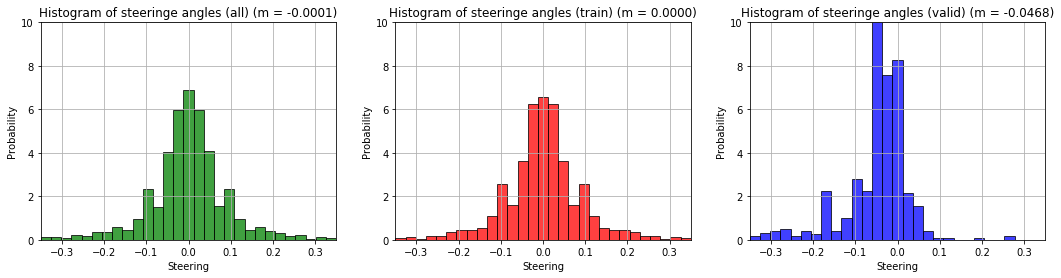

loading images to ram...
all images loaded to ram


In [31]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
# NO SHUFFLING!
datagen.split(valid_size=0.2)
datagen.activate_mod('mod_flip')
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [32]:
datagen.data

,img,steering,throttle,brake,speed,cam,filter,flip,is_train,is_valid,is_active
0,dataset4_beta_sim/IMG/left_2017_02_11_17_49_46...,0.0,0.0,0.0,7.300583e-06,L,mod_identity,1,False,True,False
1,dataset4_beta_sim/IMG/mod_lighting_left_2017_0...,0.0,0.0,0.0,7.300583e-06,L,mod_lighting,1,False,True,False
2,dataset4_beta_sim/IMG/mod_blur_left_2017_02_11...,-0.0,0.0,0.0,7.300583e-06,L,mod_blur,-1,False,True,False
3,dataset4_beta_sim/IMG/left_2017_02_11_17_49_46...,-0.0,0.0,0.0,7.300583e-06,L,mod_flip,-1,False,True,False
4,dataset4_beta_sim/IMG/mod_shadow_left_2017_02_...,0.0,0.0,0.0,7.300583e-06,L,mod_shadow,1,False,True,False
5,dataset4_beta_sim/IMG/right_2017_02_11_17_49_4...,0.0,0.0,0.0,7.300583e-06,R,mod_identity,1,False,True,False
6,dataset4_beta_sim/IMG/mod_lighting_right_2017_...,0.0,0.0,0.0,7.300583e-06,R,mod_lighting,1,False,True,False
7,dataset4_beta_sim/IMG/mod_blur_right_2017_02_1...,0.0,0.0,0.0,7.300583e-06,R,mod_blur,1,False,True,False
8,dataset4_beta_sim/IMG/right_2017_02_11_17_49_4...,-0.0,0.0,0.0,7.300583e-06,R,mod_flip,-1,False,True,False
9,dataset4_beta_sim/IMG/mod_shadow_right_2017_02...,-0.0,0.0,0.0,7.300583e-06,R,mod_shadow,-1,False,True,False


Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/10
3968/4022 [============================>.] - ETA: 0s - loss: 0.0747 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//nvidia/weights/20170810_A/weights.00-0.0085.hdf5
4096/4022 [==============================] - 11s - loss: 0.0734 - val_loss: 0.0085
Epoch 2/10
4096/4022 [==============================] - 10s - loss: 0.0228 - val_loss: 0.0076
Epoch 3/10
4096/4022 [==============================] - 11s - loss: 0.0142 - val_loss: 0.0079
Epoch 4/10
4096/4022 [==============================] - 10s - loss: 0.0117 - val_loss: 0.0080
Epoch 5/10
4096/4022 [==============================] - 10s - loss: 0.0109 - val_loss: 0.0077
Epoch 6/10
4096/4022 [==============================] - 10s - loss: 0.0099 - val_loss: 0.0078
Epoch 7/10
4096/4022 [==============================] - 10s - loss: 0.0098 - val_loss: 0.0076
Epoch 8/10
4096/4022 [==============================] - 10s - loss: 0.0093 - val_loss: 0.0077
Epoch 9/10
4096/4022 [==============================] - 10s - loss: 0.0092 - val_loss: 0.0079
Epoch 10/10
4096/4022 [==============================] - 10s - loss: 0.008

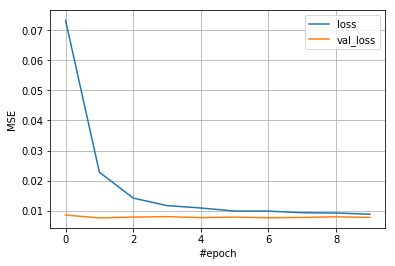

In [33]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.train_generator(datagen, "20170810_A", nb_epoch = 10)
model.plot_history();

# Training Episode 2 (beta sim, cam L/R)

shuffled data
split data into 9774 training sample and 2448 validation samples
17489 samples randomly removed due to steering < 0.080000
steering angle corrected by +/- 0.180000
Number of samples:            43621
Number of active sample:      15708
Number of training samples:   13930
Number of validation samples: 1778


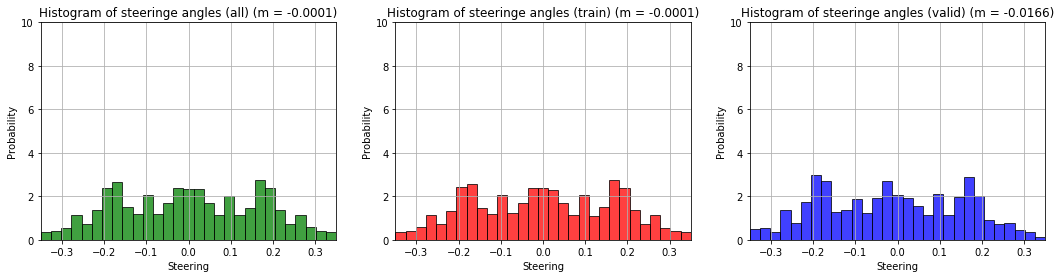

loading images to ram...
all images loaded to ram


In [34]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
datagen.add_dataset("dataset5_beta_backwards", use_original_data = True)
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.40)
datagen.correct_camera_steering(0.18) # 0.15 nicht gut!!
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/10
13824/13930 [============================>.] - ETA: 0s - loss: 0.0324 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//nvidia/weights/20170810_B/weights.00-0.0267.hdf5
13952/13930 [==============================] - 50s - loss: 0.0324 - val_loss: 0.0267
Epoch 2/10
13952/13930 [==============================] - 48s - loss: 0.0282 - val_loss: 0.0248
Epoch 3/10
13952/13930 [==============================] - 48s - loss: 0.0267 - val_loss: 0.0245
Epoch 4/10
13952/13930 [==============================] - 48s - loss: 0.0262 - val_loss: 0.0240
Epoch 5/10
13952/13930 [==============================] - 48s - loss: 0.0255 - val_loss: 0.0235
Epoch 6/10
13952/13930 [==============================] - 47s - loss: 0.0246 - val_loss: 0.0232
Epoch 7/10
13952/13930 [==============================] - 48s - loss: 0.0241 - val_loss: 0.0232
Epoch 8/10
13952/13930 [==============================] - 48s - loss: 0.0237 - val_loss: 0.0218
Epoch 9/10
13952/13930 [==============================] - 48s - loss: 0.0231 - val_loss: 0.0223
Epoch 10/10
13952/13930 [==============================]

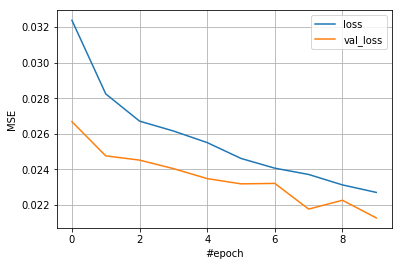

In [35]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170810_A", 9)
model.train_generator(datagen, "20170810_B", nb_epoch = 10)
model.plot_history();

# Training Episode 5: all-in

shuffled data
split data into 33598 training sample and 8450 validation samples
101414 samples randomly removed due to steering < 0.080000
18115 samples randomly removed due to steering < 0.050000
steering angle corrected by +/- 0.180000
Number of samples:            90711
Number of active sample:      32443
Number of training samples:   28768
Number of validation samples: 3675


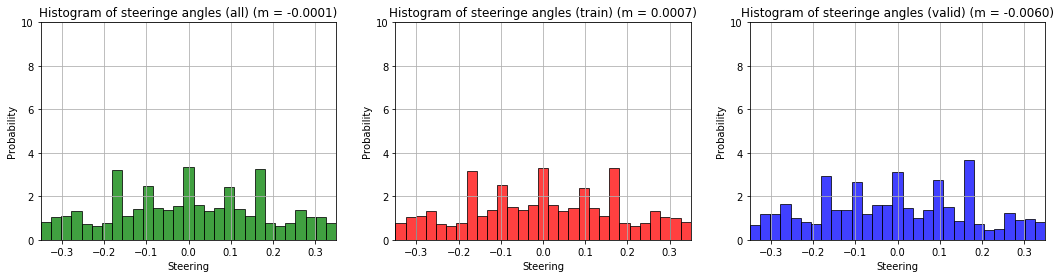

loading images to ram...
all images loaded to ram


In [40]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset1_udacity", use_original_data = True)
datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
datagen.add_dataset("dataset5_beta_backwards", use_original_data = True)
datagen.add_dataset("dataset6_curve2A", use_original_data = True)
datagen.add_dataset("dataset7_curve2B", use_original_data = True)
datagen.add_dataset("dataset8_curve3A", use_original_data = True)
datagen.add_dataset("dataset8_curve3B", use_original_data = True)
datagen.add_dataset("dataset8_curve3C", use_original_data = True)
datagen.add_dataset("dataset8_curve3D", use_original_data = True)
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.70)
datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.50)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [41]:
model = self_driving_car.model.SDRegressionModel(MODEL)
#model.load_weights("20170810_B", 9)
model.train_generator(datagen, "20170810_X", nb_epoch = 50)
model.plot_history();

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/50
28672/28768 [============================>.] - ETA: 0s - loss: 0.0716  

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//nvidia/weights/20170810_X/weights.00-0.0470.hdf5
28800/28768 [==============================] - 187s - loss: 0.0715 - val_loss: 0.0470
Epoch 2/50
28800/28768 [==============================] - 180s - loss: 0.0533 - val_loss: 0.0469
Epoch 3/50
28800/28768 [==============================] - 178s - loss: 0.0518 - val_loss: 0.0454
Epoch 4/50
28800/28768 [==============================] - 171s - loss: 0.0509 - val_loss: 0.0469
Epoch 5/50
28800/28768 [==============================] - 211s - loss: 0.0505 - val_loss: 0.0452
Epoch 6/50
28800/28768 [==============================] - 212s - loss: 0.0500 - val_loss: 0.0472
Epoch 7/50
28800/28768 [==============================] - 209s - loss: 0.0498 - val_loss: 0.0454
Epoch 8/50
 5760/28768 [=====>........................] - ETA: 146s - loss: 0.0509

KeyboardInterrupt: 

# FAVORIT: 20170213_C, Epoch 2

split data into 19286 training sample and 4822 validation samples
79822 samples randomly removed due to steering < 0.100000
steering angle corrected by +/- 0.250000
Number of samples:            40718
Number of active sample:      14622
Number of training samples:   13023
Number of validation samples: 1599


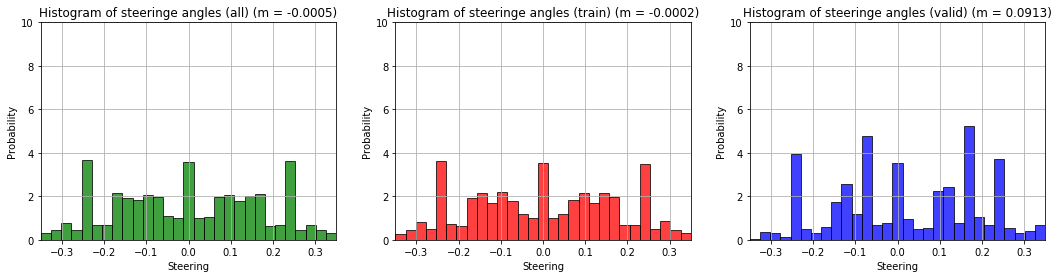

loading images to ram...
all images loaded to ram


In [90]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset1_udacity", use_original_data = True)
#datagen.add_dataset("dataset4_beta_sim", use_original_data = True)
#datagen.add_dataset("dataset6_curve2A", use_original_data = True)
#datagen.add_dataset("dataset7_curve2B", use_original_data = True)
#datagen.add_dataset("dataset8_curve3A", use_original_data = True)
#datagen.add_dataset("dataset8_curve3B", use_original_data = True)
#datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.correct_camera_steering(0.25)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

setting learning rate to 0.000000
Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/1
12928/13023 [============================>.] - ETA: 0s - loss: 0.0920 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//nvidia/weights/20170810_S3/weights.00-0.0556.hdf5
13056/13023 [==============================] - 44s - loss: 0.0919 - val_loss: 0.0556


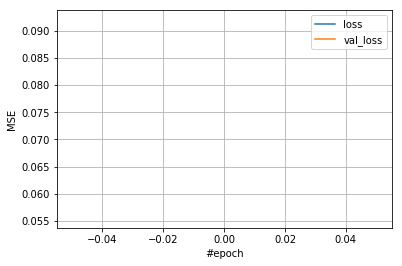

In [91]:
model = self_driving_car.model.SDRegressionModel(MODEL)
#model.load_weights("20170810_C", 19)
model.load_weights("20170810_Q", 0)
model.train_generator(datagen, "20170810_S3", nb_epoch = 1, lr=0.00000001)
model.plot_history();

shuffled data
split data into 9745 training sample and 2456 validation samples
41617 samples randomly removed due to steering < 0.100000
steering angle corrected by +/- 0.180000
5428 samples randomly removed due to steering < 0.100000
Number of samples:            13960
Number of active sample:      5063
Number of training samples:   4485
Number of validation samples: 578


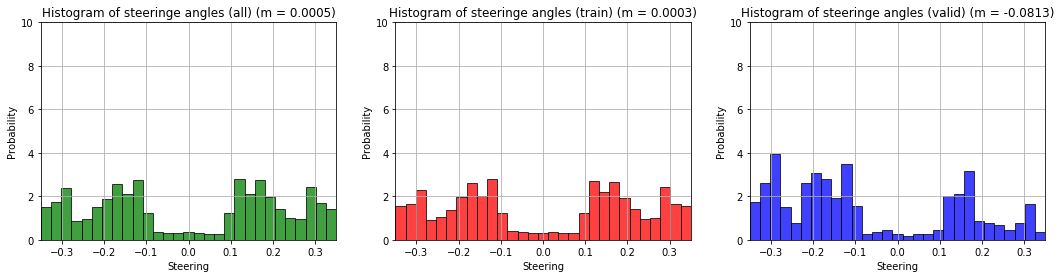

loading images to ram...
all images loaded to ram


In [51]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.add_dataset("dataset8_curve3A")
datagen.add_dataset("dataset8_curve3B")
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.correct_camera_steering(0.18)
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.plot_stats()
datagen.load_img_to_ram()

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/10
4480/4485 [============================>.] - ETA: 0s - loss: 0.0466 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//nvidia/weights/20170810_R3/weights.00-0.0238.hdf5
4608/4485 [==============================] - 10s - loss: 0.0464 - val_loss: 0.0238
Epoch 2/10
4608/4485 [==============================] - 8s - loss: 0.0338 - val_loss: 0.0204
Epoch 3/10
4608/4485 [==============================] - 9s - loss: 0.0329 - val_loss: 0.0208
Epoch 4/10
4608/4485 [==============================] - 9s - loss: 0.0306 - val_loss: 0.0194
Epoch 5/10
4608/4485 [==============================] - 9s - loss: 0.0300 - val_loss: 0.0182
Epoch 6/10
4608/4485 [==============================] - 9s - loss: 0.0285 - val_loss: 0.0169
Epoch 7/10
4608/4485 [==============================] - 9s - loss: 0.0277 - val_loss: 0.0176
Epoch 8/10
4608/4485 [==============================] - 9s - loss: 0.0276 - val_loss: 0.0185
Epoch 9/10
4608/4485 [==============================] - 9s - loss: 0.0266 - val_loss: 0.0179
Epoch 10/10
4608/4485 [==============================] - 9s - loss: 0.0262 - val_

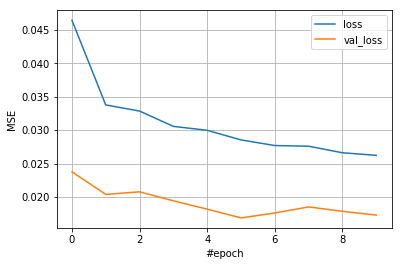

In [52]:
model = self_driving_car.model.SDRegressionModel(MODEL)
#model.load_weights("20170810_C", 19)
model.load_weights("20170810_Q", 0)
model.train_generator(datagen, "20170810_R3", nb_epoch = 10)
model.plot_history();

In [ ]:
1/0

# ----------------------- AKTUELL --------------------

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_D2", 6)
model.train_generator(datagen, "20170213_E1", nb_epoch = 5, lr=0.0005)
model.plot_history();

# FAVORIT: 20170213_D2, Epoch 6 --> Kurve 3

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
#datagen.add_dataset("dataset6_curve2A")
#datagen.add_dataset("dataset7_curve2B")
datagen.add_dataset("dataset8_curve3A")
datagen.add_dataset("dataset8_curve3B")
datagen.add_dataset("dataset8_curve3C")
datagen.add_dataset("dataset8_curve3D")
datagen.shuffle()
datagen.split(valid_size=0.3) 
datagen.activate_mod('mod_flip')
datagen.deactivate_cam('L')
datagen.deactivate_cam('R')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.75)
#datagen.correct_camera_steering(0.19)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.90)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170213_D2", 6)
model.train_generator(datagen, "20170308_XE", nb_epoch = 4) # TODO Learning Rate
model.plot_history();

# FAVORIT: 20170213_XA, Epoch 5 --> Kurve 3

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
#datagen.add_dataset("dataset4_beta_sim")
#datagen.add_dataset("dataset6_curve2A")
#datagen.add_dataset("dataset7_curve2B")
datagen.add_dataset("dataset8_curve3A")
datagen.add_dataset("dataset8_curve3B")
datagen.add_dataset("dataset8_curve3C")
datagen.add_dataset("dataset8_curve3D")
datagen.shuffle()
datagen.split(valid_size=0.3) 
datagen.activate_mod('mod_flip')
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.70)
datagen.correct_camera_steering(0.18)
datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.70)
datagen.plot_stats()
datagen.load_img_to_ram(flip=True)

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170308_XA", 4)
#model.train_generator(datagen, "20170308_YA", nb_epoch = 8) # TODO Learning Rate
model.train_generator(datagen, "20170308_YD", nb_epoch = 3) # TODO Learning Rate
model.plot_history();

In [ ]:
1/0

# Training Episode 3 *alternativ* (backward data + beta) --> ÜBERSPRUNGEN

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset5_beta_backwards")
datagen.shuffle()
datagen.split(valid_size=0.2)    
datagen.activate_mod('mod_flip')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.20)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_C", nb_epoch = 10) # lr=0.01
model.plot_history();

# Training Episode 4: refinement

In [ ]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.2) 
datagen.activate_mod('mod_flip')
#datagen.activate_mod('mod_lighting')
#datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.50)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [ ]:
model = self_driving_car.model.SDRegressionModel(MODEL)
model.load_weights("20170212_B", 5)
model.train_generator(datagen, "20170212_D", nb_epoch = 12)
model.plot_history();

In [ ]:
1/0

In [ ]:
replacer = lambda x: x.replace('IMG_preprocessed', 'IMG')
datagen.data['img'] = datagen.data['img'].apply(replacer)
x = datagen.data['img'].get_values()
print(x)

(160, 320, 3) uint8


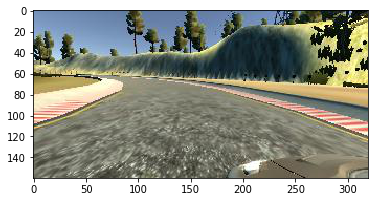

(160, 320, 3) uint8


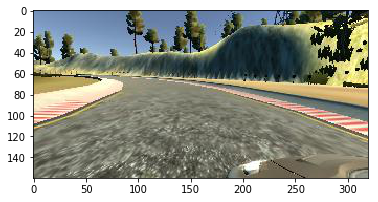

<module 'tensorflow' from '/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/__init__.py'>


In [86]:
import cv2
import tensorflow as tf

img1 = plt.imread('/mnt/data/dataset4_beta_sim/IMG/left_2017_02_11_17_49_46_987.jpg')
print(img1.shape, img1.dtype)
plt.imshow(img1)
plt.show();

img2 = cv2.imread('/mnt/data/dataset4_beta_sim/IMG/left_2017_02_11_17_49_46_987.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(img2.shape, img2.dtype)
plt.imshow(img2)
plt.show();

tf1 = tf.image.resize_images(img2, (66, 200))
print(tf)